<a href="https://colab.research.google.com/github/HyeranYang/STUDY_kaggle_data_analysis/blob/main/titanic_scaler_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 참고자료

* https://ashhyun.github.io/kaggle/Titanic_2/

# Import

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate

# 데이터 준비

In [ ]:
titanic_csv = '/content/drive/MyDrive/Colab Notebooks/스터디/train.csv'

## 데이터 설명

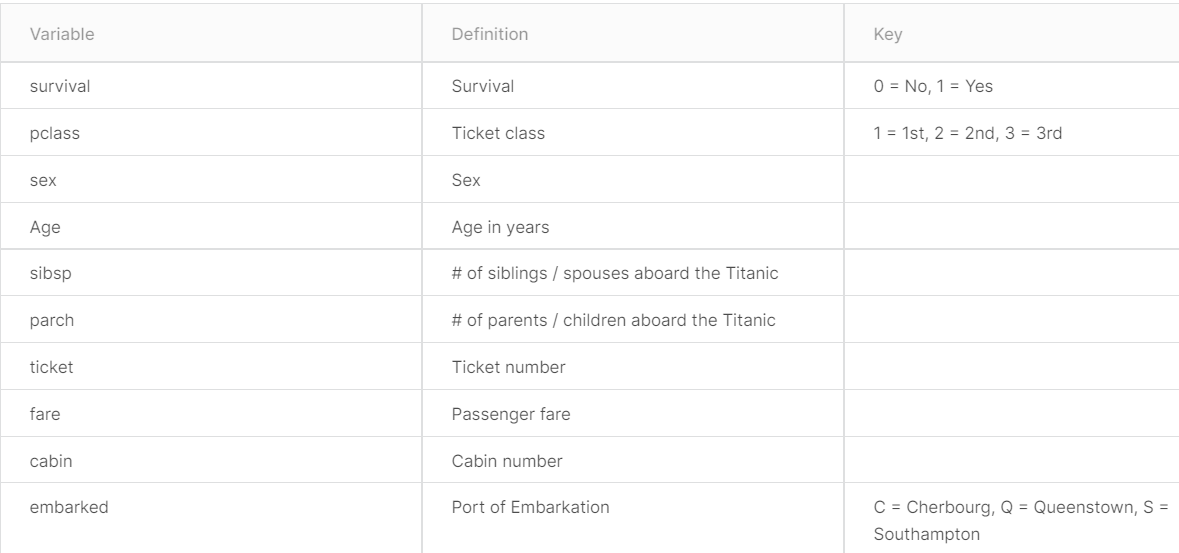

In [ ]:
titanic = pd.read_csv(titanic_csv)
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# 데이터 탐색

In [ ]:
titanic.info()
# 총 891명 데이터.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic.isnull().sum()  # null값을 true=1로 sum을 하면 갯수 파악가능.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic['Survived'].value_counts()  # 342명 생존 

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
titanic['Pclass'].value_counts()  # 각 객실등급별 승객 숫자.

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
titanic['Sex'].value_counts()      # 성별 승객 숫자.

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
titanic[['Age', 'Fare']].describe()   # 승객의 연령, 요금(연속형 변수)의 분포 

# Age가 약 180개 정도가 null 값임을 알 수 있다. (891-714)

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [ ]:
titanic['Cabin'].size        # Cabin 열의 전체 행의 갯수는 891.(null값 포함)

891

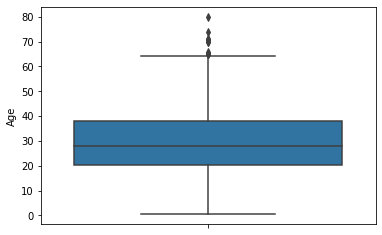

In [ ]:
sns.boxplot(y=titanic['Age'])
plt.show()

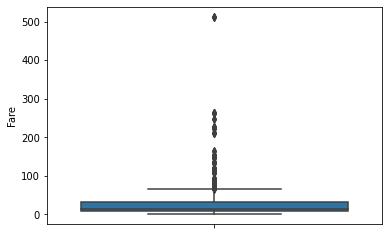

In [ ]:
sns.boxplot(y=titanic['Fare'])    # 일부 승객들(이상치)를 제외하고 대부분의 승객들은 티켓가격이 유사했다. 
plt.show()                        # 하지만 그 이상치가 굉장히 격차가 크다.

In [ ]:
titanic['Cabin'].count()     # Cabin 열의 유효 값의 갯수는 204.(*null값 제외!!!)

# 'Cabin' 열은 null값이 너무 많아서, (75%가 null값) 의미가 없는 열이다.
# 'Cabin' 열은 drop 하는 것이 예측에 유리해보인다.

204

In [ ]:
titanic['Ticket'].describe        # Ticket 열은 모든 행이 unique값인 열로, 생존자 여부에 영향 없을것으로 유추됨.

<bound method NDFrame.describe of 0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object>

In [ ]:
titanic['SibSp'].value_counts()   

# 타이타닉에 함께 탄 형제 또는 배우자 숫자
# 반 이상의 사람들이 0값을 가지고 있다.

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [ ]:
titanic['Parch'].value_counts()     

# 타이타닉에 함께 탄 부모 또는 자식의 숫자
# 반 이상의 사람들이 0값을 가지고 있다.

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [ ]:
titanic['Embarked'].value_counts()          # 승객들의 승선지 분포. 대다수가 Southhampton에서 승선.

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### 성별 생존자 비율

In [ ]:
# 성별 생존자 비율  = 성별 생존자 수 / 성별 승객 수 

# 생존자 df 만들기
survival = titanic[titanic['Survived'] == 1]
survival

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [ ]:
# 생존자 중 성별 인원
survival.groupby('Sex').size()   # 리턴값: 시리즈

Sex
female    233
male      109
dtype: int64

In [ ]:
# 승객 중 성별 인원
titanic.groupby('Sex').size()

Sex
female    314
male      577
dtype: int64

In [ ]:
# 성별 생존자 비율 값
sur_per_sex = survival.groupby('Sex').size() / titanic.groupby('Sex').size()
sur_per_sex

# 여성중에 74%가 생존, 남성중에 18%가 생존.
# 성별로 생존 비율에 큰 차이를 보이므로, 생존자 예측에 성별이 영향을 미친다고 예상할 수 있다.

Sex
female    0.742038
male      0.188908
dtype: float64

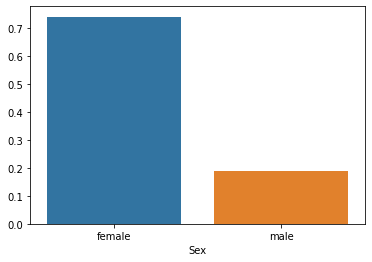

In [ ]:
# 성별 생존자 비율 시각화
sns.barplot(x=sur_per_sex.index, y=sur_per_sex.values)
plt.show()

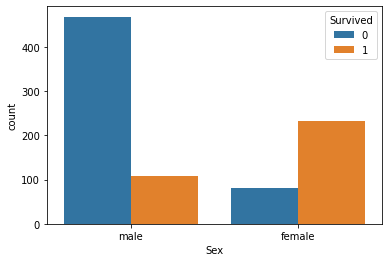

In [ ]:
# 성별 생존자 인원 비교
sns.countplot(data=titanic, x='Sex', hue='Survived')
plt.show()

# 남자가 많이 죽었다.

### 객실등급(pclass)별 생존자 비율

In [ ]:
# 객실 등급별 생존자 비율 = 객실등급별 생존자 인원 / 객실등급별 인원

# 객실등급별 생존자 인원
survival.groupby('Pclass').size()

Pclass
1    136
2     87
3    119
dtype: int64

In [ ]:
# 객실등급별 인원
titanic.groupby('Pclass').size()

Pclass
1    216
2    184
3    491
dtype: int64

In [ ]:
# 객실 등급별 생존자 비율 
sur_per_class = survival.groupby('Pclass').size() / titanic.groupby('Pclass').size()
sur_per_class

# 1등급 객실 승객의 62%가 생존, 2등급 객실 승객의 47%가 생존, 3등급 객실 승객의 24%가 생존.
# 객실 등급별로 생존자 비율에 큰 차이를 보이므로, 생존자 예측에 객실 등급이 영향을 미친다고 예상 가능.

Pclass
1    0.629630
2    0.472826
3    0.242363
dtype: float64

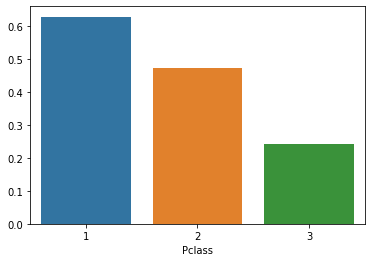

In [ ]:
# 객실 등급별 생존자 비율 시각화
sns.barplot(x=sur_per_class.index, y=sur_per_class.values)
plt.show()

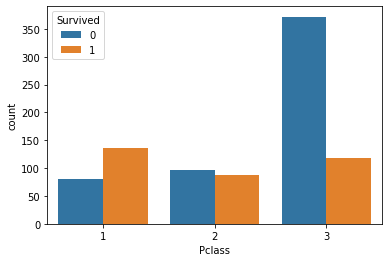

In [ ]:
# seaborn 이용하면, 이렇게 어렵게 안해도 되는 것 같음.
# 객실 등급별 생존자 인원
sns.countplot(data=titanic, x='Pclass', hue='Survived')
plt.show()

# 3등급 객실의 사망자수가 압도적으로 높다.
# 단, 승객수가 많아서 일수도 있으므로, 비율도 살펴볼 필요가 있다.

### SibSp(형제, 배우자) 별 생존자 비율

In [ ]:
# SibSp 에 따른 생존자 비율 구해보기 - 생존여부에 영향을 미치는지 예상해보기 위해.
# = sibsp에 따른 생존자 수 / sibsp에 따른 승객 수

survival.groupby('SibSp').size()   # 5, 6, 7, 8 이 없다.

SibSp
0    210
1    112
2     13
3      4
4      3
dtype: int64

In [ ]:
# sibsp에 따른 승객 수
titanic.groupby('SibSp').size()   # 6, 7 이 없다.

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
dtype: int64

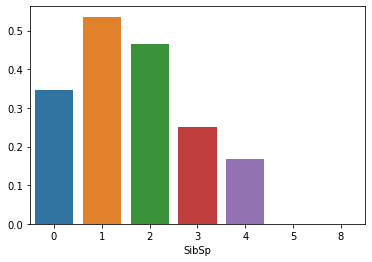

In [ ]:
# SibSp 에 따른 생존자 비율 
s = survival.groupby('SibSp').size() / titanic.groupby('SibSp').size()
sns.barplot(x=s.index, y=s.values)
plt.show()


### Parch(부모, 자녀)별 생존자 비율

In [ ]:
# Parch에 따른 생존자 비율 구해보기

# Parch별 생존자 인원 
survival.groupby('Parch').size()   # 4, 6 ... 해당 값이 없음.

Parch
0    233
1     65
2     40
3      3
5      1
dtype: int64

In [ ]:
# Parch별 승객 인원
titanic.groupby('Parch').size()

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
dtype: int64

In [ ]:
# Parch에 따른 생존자 비율
p = survival.groupby('Parch').size() / titanic.groupby('Parch').size()
p

# 4, 6 값이 빠져있다.

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4         NaN
5    0.200000
6         NaN
dtype: float64

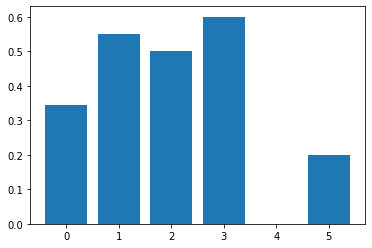

In [ ]:
plt.bar(x=p.index, height=p.values)
plt.show()

### Embarked(승선지) 별 생존자 비율

In [ ]:
# Embarked 에 따른 생존자 비율 = embark 별 생존자 인원 / embark별 승객인원

# embark별 생존자 인원
survival.groupby('Embarked').size()

Embarked
C     93
Q     30
S    217
dtype: int64

In [ ]:
# embark별 승객인원
titanic.groupby('Embarked').size()

Embarked
C    168
Q     77
S    644
dtype: int64

In [ ]:
# Embarked 에 따른 생존자 비율
e = survival.groupby('Embarked').size() / titanic.groupby('Embarked').size()
e

# Q와 S는 생존자 비율이 유사한데, C만 20%차이나게 높다.

Embarked
C    0.553571
Q    0.389610
S    0.336957
dtype: float64

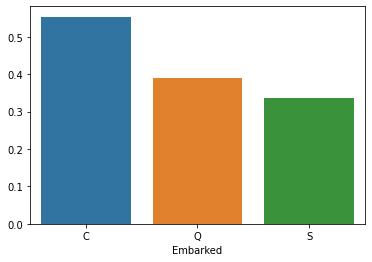

In [ ]:
sns.barplot(x=e.index, y=e.values)
plt.show()

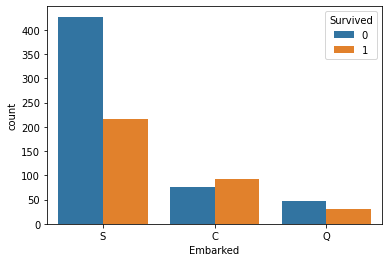

In [ ]:
# 승선지별 사망자수 인원 그래프
sns.countplot(data=titanic, x='Embarked', hue='Survived')
plt.show()

# S(Southampton)에서 탄 사람들이 많이 죽었다는 것을 알 수 있다.

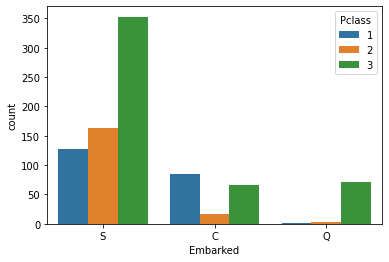

In [ ]:
# 승선지가 예상외로 영향을 미치고 있다. - 승선지별로 객실등급이 달랐던 것 같다. 

sns.countplot(data=titanic, x='Embarked', hue='Pclass')
plt.show()

# 생존율이 높았던 C(Cherborg)에서 1등급 객실 승객이 많이 탔다 - 그래서 생존율이 높았던 것.
# S에서는 3등급 승객들이 많이 탔다. 그래서 생존율이 낮았다. 

## 객실등급별 Fare 가격 분포 

* 객실등급별 티켓 가격이 어떻게 달라지는지 궁금.

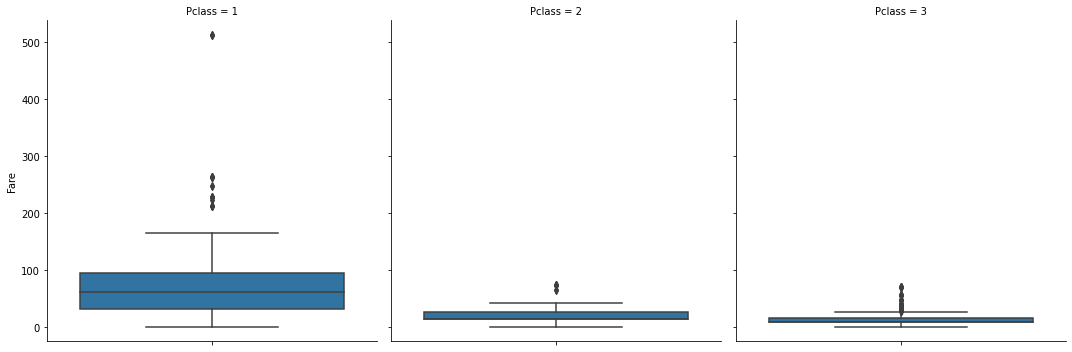

In [ ]:
sns.catplot(data=titanic, y='Fare', col='Pclass', kind='box')
plt.show()

## 객실등급별 Age 분포

* age의 null값을 어떻게 대체할 것이냐 - age 에 영향을 주는 요인들을 파악하려고 함.
* 후보 : 객실등급, SibSp, Parch

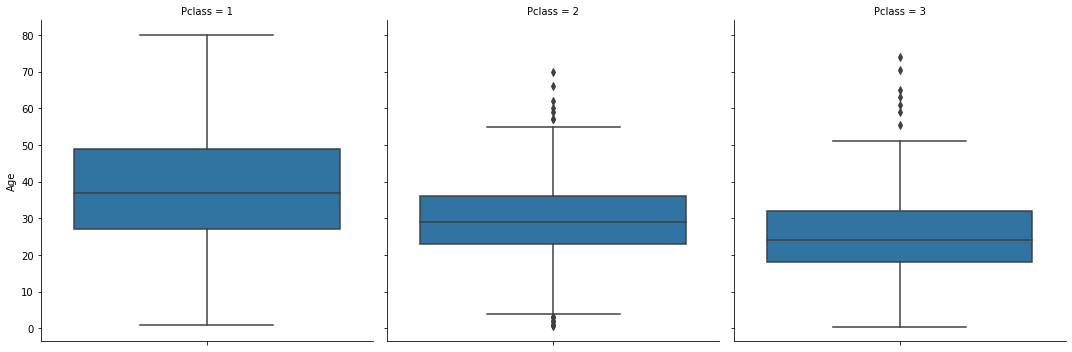

In [ ]:
sns.catplot(data=titanic, y='Age', col='Pclass', kind='box')
plt.show()

In [ ]:
# 객실등급별 age의 기술통계량을 구해보자.
titanic.groupby('Pclass')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


In [ ]:
# 각 객실등급별 age의 최빈값은? - 각 등급별 연령 평균, 중위값과 크게 차이는 안난다.

# 1등급
titanic[titanic['Pclass']==1]['Age'].mode()

0    35.0
1    36.0
dtype: float64

In [ ]:
# 2등급
titanic[titanic['Pclass']==2]['Age'].mode()

0    24.0
1    34.0
dtype: float64

In [ ]:
# 3등급
titanic[titanic['Pclass']==3]['Age'].mode()

0    22.0
dtype: float64

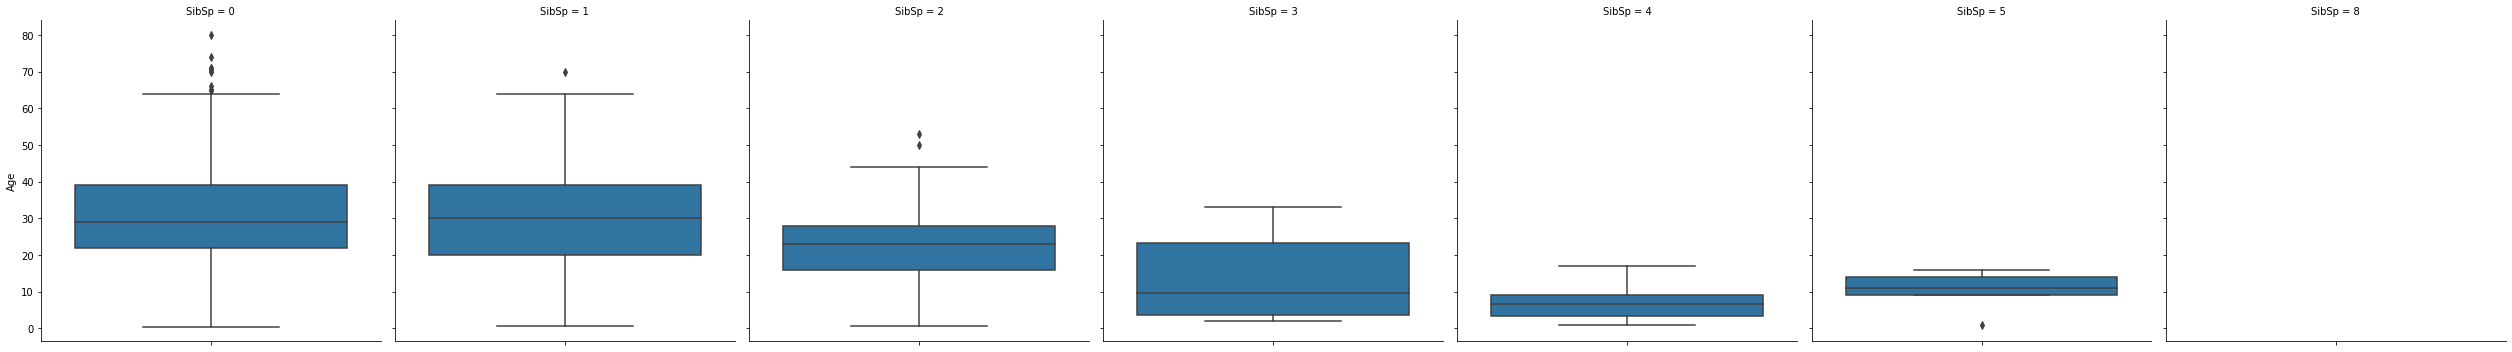

In [ ]:
# SibSp별 age의 분포도 의미가 있을까? - 애매함.
sns.catplot(data=titanic, y='Age', col='SibSp', kind='box')
plt.show()


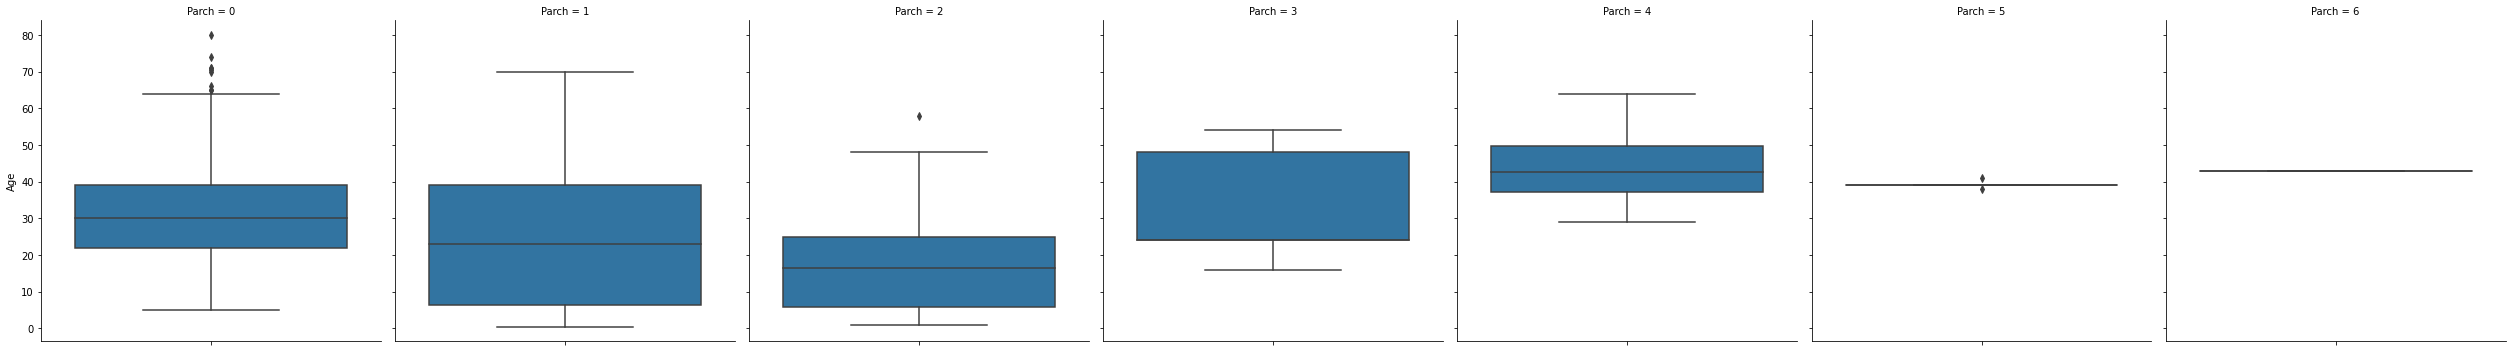

In [ ]:
# Parch별 age의 분포도 의미가 있을까? - 의미가 없다.
sns.catplot(data=titanic, y='Age', col='Parch', kind='box')
plt.show()

# 데이터 전처리

In [ ]:
# SibSp와 Parch도 지워버리고 싶은데, 지워도 되는건지를 모르겠다. - 그 판단근거를 알고 싶다.

https://zhining.tistory.com/27

* 결측치 처리 필요 이유, 방법 참고자료
* 결측치는 삭제하거나 값을 치환해서 없애주어야한다!
* 결측치는 비율에 따라서 처리 방법을 달리한다!
    * 10% 미만이라면: row를 삭제하거나 치환한다.
    * 10~50% 사이라면: 모델을 만들어서 처리한다.
    * 50% 이상이라면: column을 삭제한다.

## Passenger Id 열 인덱스로 변환

In [ ]:
titanic.set_index('PassengerId', inplace=True)
# 인덱스를 passenger id 컬럼으로 사용. 
# inplace : 새로운 df 만들지말고, 기존df 수정.

## Ticket, Cabin 열 삭제

In [ ]:
# Ticket(전부다 unique값), Cabin(null값이 너무 많음) 열 삭제

titanic = titanic.drop(columns=['Ticket', 'Cabin'])
titanic   # 컬럼 개수가 12개 -> 10개로 줄었다.

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S


## Sex 칼럼 숫자로 변환하기

* male=0, female=1로 변환하기.
* 문자열 데이터라, 숫자형으로 변환하여 모델 학습이 용이하게 변경.

In [ ]:
dic = {"male" : 0, "female" : 1}
titanic['Sex'] = titanic['Sex'].map(dic)

In [ ]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


## Name 컬럼에서 Prefix 뽑아내기

* 정규표현식을 이용해 Mr, Miss, Mrs 호칭 뽑아내기.

In [ ]:
titanic.Name.head(10)

PassengerId
1                               Braund, Mr. Owen Harris
2     Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                Heikkinen, Miss. Laina
4          Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                              Allen, Mr. William Henry
6                                      Moran, Mr. James
7                               McCarthy, Mr. Timothy J
8                        Palsson, Master. Gosta Leonard
9     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [ ]:
titanic['Prefix']= titanic['Name'].str.extract('([A-Za-z]+)\.', expand=False)
titanic['Prefix'].value_counts()

# ([A-Za-z]+)\.
# [A-Za-z] : 알파벳문자
# + : 1번 이상의 발생.
# () : 문자그룹. 괄호 내 쌍이 그룹을 형성.
# \. : 마침표와 일치하기.
# expand = True 로 하면, 추출결과 바로 데이터프레임으로 만들기.

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Prefix, dtype: int64

In [ ]:
# 정규표현식 이해하기/연습 - 맨앞에(, 앞) 이름들 뽑아내보기
titanic['Name'].str.extract('([A-Za-z]+)\,', expand=False)

PassengerId
1         Braund
2        Cumings
3      Heikkinen
4       Futrelle
5          Allen
         ...    
887     Montvila
888       Graham
889     Johnston
890         Behr
891       Dooley
Name: Name, Length: 891, dtype: object

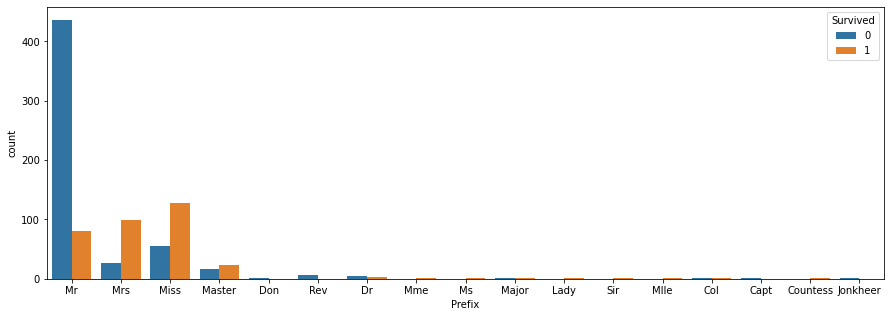

In [ ]:
# Prefix 별 생존자 인원 확인
plt.figure(figsize=(15,5))
sns.countplot(data=titanic, x='Prefix', hue='Survived')
plt.show()

# Miss > Mrs > Mr 순으로 생존인원이 많다. - 생존율에 영향미침 확인.
# Mr는 사망자수가 많다.

In [ ]:
# Prefix를 0,1,2,3,4로 변환 - 모델 학습 쉽게 하기 위해.
# Prefix가 생존율에 영향을 미치므로, 모델학습에 필요한 변수이므로.
# Mr=0, Mrs=1, Miss=2, Master=3, 그외 = 4 (생존율에 큰 차이 없음)로 변환.

dic = {'Mr':0, 'Mrs':1, 'Miss':2, 'Master':3, 
       'Don':4, 'Rev':4, 'Dr':4, 'Mme':4, 'Ms':4, 
       'Major':4, 'Lady':4, 'Sir':4, 'Mlle':4, 'Col':4,
       'Capt':4, 'Countess':4, 'Jonkheer':4}

titanic['Prefix'] = titanic['Prefix'].map(dic) 

In [ ]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Prefix
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,1
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,1
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,0


## Name 열 삭제 
* prepix를 뽑아내었으므로 삭제한다. 모델링에 name열 사용 안할 것이므로.

In [ ]:
titanic.drop(columns='Name', inplace=True)

In [ ]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Prefix
PassengerId,,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,S,0
2,1,1,1,38.0,1,0,71.2833,C,1
3,1,3,1,26.0,0,0,7.9250,S,2
4,1,1,1,35.0,1,0,53.1000,S,1
5,0,3,0,35.0,0,0,8.0500,S,0


## Age 결측치 처리 - 객실등급별 중위값으로 대체

* age열의 null값이 180행, 20.20%로 모델을 만들어서 처리해야함.
* 객실등급별로 Age의 분포가 달라졌다. 
* 객실등급별 age의 중위값으로 null값 대체. - 이렇게 df 따로 저장해서 모델링 해보고 평가해보기.(평균은 소수점이 나와서 중위값으로.)

In [ ]:
titanic.groupby('Pclass')['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [ ]:
titanic['Age'].fillna(titanic.groupby('Pclass')['Age'].transform('median'), inplace=True)

# transfrom: df에 ()에 입력받은 함수를 적용하는 함수. 그룹핑한 결과에 따른 통계값을 입력할 수 있다.

In [ ]:
titanic['Age'].describe()  # null값이 채워졌다.

count    891.000000
mean      29.066409
std       13.244532
min        0.420000
25%       22.000000
50%       26.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

## Embarked 결측치 처리 

* 승선지와 객실등급은 서로 상관관계가 있었다.
* 따라서, null값의 객실등급을 확인하여, 그 등급의 가장 최빈값 승선지로 null값을 대체하자.

In [ ]:
titanic['Embarked'].isnull().sum()

2

In [ ]:
titanic[titanic['Embarked'].isnull()]  #null값의 pcalss는 다 1등급이다.

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Prefix
PassengerId,,,,,,,,,
62,1,1,1,38.0,0,0,80.0,NaN,2
830,1,1,1,62.0,0,0,80.0,NaN,1


In [ ]:
titanic.groupby('Pclass')['Embarked'].value_counts()  # 1등급의 Embarked 최빈값은 S다.

Pclass  Embarked
1       S           127
        C            85
        Q             2
2       S           164
        C            17
        Q             3
3       S           353
        Q            72
        C            66
Name: Embarked, dtype: int64

In [ ]:
# S로 null값을 채워주자.
titanic['Embarked'].fillna('S', inplace=True)

In [ ]:
titanic['Embarked'].isnull().sum()  # 결측치가 채워졌다.

0

## Embarked 숫자로 매핑

* S = 0, C = 1, Q = 2로 매핑하여, 숫자형으로 데이터 변환.

In [ ]:
dic = {'S':0, 'C':1, 'Q':2}
titanic['Embarked'] = titanic['Embarked'].map(dic)

In [ ]:
titanic.head()  # Embarked가 숫자로 변환된 것을 확인 할 수 있다.

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Prefix
PassengerId,,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,0,0
2,1,1,1,38.0,1,0,71.2833,1,1
3,1,3,1,26.0,0,0,7.9250,0,2
4,1,1,1,35.0,1,0,53.1000,0,1
5,0,3,0,35.0,0,0,8.0500,0,0


# 데이터 모델링

## 특성, 타겟값 정의

In [ ]:
y = titanic['Survived'].values.copy()
X = titanic.iloc[:, 1:].values.copy()

In [ ]:
X[:5]

array([[ 3.    ,  0.    , 22.    ,  1.    ,  0.    ,  7.25  ,  0.    ,
         0.    ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833,  1.    ,
         1.    ],
       [ 3.    ,  1.    , 26.    ,  0.    ,  0.    ,  7.925 ,  0.    ,
         2.    ],
       [ 1.    ,  1.    , 35.    ,  1.    ,  0.    , 53.1   ,  0.    ,
         1.    ],
       [ 3.    ,  0.    , 35.    ,  0.    ,  0.    ,  8.05  ,  0.    ,
         0.    ]])

In [ ]:
y[:5]

array([0, 1, 1, 1, 0])

## train/test 셋 나누기 : K-fold 교차검증

* 교차검증 : 별도의 여러세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행하는 것. ML 성능평가는 교차 검증 기반으로 1차 평가를 한 뒤에 최종적으로 테스트 데이터 세트에 적용해 평가하는 프로세스
    * 기존 학습 데이터를 다시 학습+검증 데이터로 분할.

* K FOLD 교차검증 : K개의 데이터 폴드 세트를 만들어서 K번만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행. 
    * K번의 예측평가를 평균내서 성능평가

In [ ]:
k_fold = KFold(n_splits=20, shuffle=True, random_state=1)

# n_splits : K개수. 몇 개의 데이터 폴드 세트를 만들 것인지.

## KNN Classifier 사용

* survived가 0과 1인 이진분류로 볼 수 있음.

In [ ]:
clf = KNeighborsClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold,  n_jobs=-1, scoring=scoring)
# cross_val_score 의 반환 값은 scoring 파라미터로 지정된 측정값을 배열 형태로 리턴.
# model, train, traget
# cv :교차검증에 무엇을 사용할 것인지. default는 5-fold cv
# n_jobs : 병렬로 실행할 작업수. 사용할 코어수를 지정.  -1은 모든 cpu사용을 의미.
# scoring : 예측 성능 평가지표.


print(score)
print('점수 평균: ' + str(round(np.mean(score)*100, 2)))

[0.64444444 0.68888889 0.73333333 0.82222222 0.71111111 0.57777778
 0.73333333 0.68888889 0.64444444 0.73333333 0.73333333 0.75
 0.70454545 0.70454545 0.70454545 0.77272727 0.70454545 0.77272727
 0.61363636 0.81818182]
점수 평균: 71.28


* n_jobs 뜻 : https://aimb.tistory.com/150
    * 사용하는 cpu 코어개수에 비례해 속도가 빨라진다. Colab의 CPU core 수는 2개. 

## SVM(SVC)

In [ ]:
clf = SVC(gamma='auto')
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=-1, scoring=scoring)
print(score)
print('점수 평균: ' + str(round(np.mean(score)*100, 2)))

# gamma가 크면 decision boundary는 더 굴곡지고, 
# gamma가 작으면 decision boundary는 직선에 가까움.

[0.66666667 0.68888889 0.73333333 0.77777778 0.62222222 0.57777778
 0.8        0.71111111 0.71111111 0.77777778 0.75555556 0.77272727
 0.77272727 0.77272727 0.68181818 0.77272727 0.59090909 0.81818182
 0.79545455 0.77272727]
점수 평균: 72.86


## DecisionTree

In [ ]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold,  n_jobs=-1, scoring=scoring)
print(score)
print('점수 평균: ' + str(round(np.mean(score)*100, 2)))

[0.8        0.73333333 0.77777778 0.64444444 0.75555556 0.68888889
 0.62222222 0.73333333 0.71111111 0.86666667 0.84444444 0.77272727
 0.86363636 0.88636364 0.70454545 0.81818182 0.88636364 0.86363636
 0.81818182 0.75      ]
점수 평균: 77.71


## 랜덤포레스트
* 앙상블 머신러닝 모델. 다수의 의사결정 트리를 만들고, 그 나무들의 분류를 집계해서 최종적으로 분류.

In [ ]:
clf = RandomForestClassifier(n_estimators=200)
# n_estimator 기본값 : 100
# n_estimators 기본값일때 점수평균 : 80.85
# n_estimators=200일때 : 81.52

scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold,  n_jobs=-1, scoring=scoring)
print(score)
print('점수 평균: ' + str(round(np.mean(score)*100, 2)))

[0.73333333 0.8        0.77777778 0.73333333 0.82222222 0.73333333
 0.77777778 0.75555556 0.75555556 0.84444444 0.84444444 0.79545455
 0.88636364 0.88636364 0.84090909 0.84090909 0.84090909 0.93181818
 0.86363636 0.77272727]
점수 평균: 81.18


# 랜덤포레스트로 승객 생사 예측하기

* 랜덤포레스트의 정확도가 가장 높다.

### test 데이터 전처리

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/스터디/test.csv')

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test.drop(columns=['Ticket', 'Cabin'], inplace=True)

In [ ]:
dic = {"male" : 0, "female" : 1}
test['Sex'] = test['Sex'].map(dic)

In [ ]:
test['Prefix']= test['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [ ]:
test.drop(columns='Name', inplace=True)

In [ ]:
dic = {'Mr':0, 'Mrs':1, 'Miss':2, 'Master':3, 
       'Don':4, 'Rev':4, 'Dr':4, 'Mme':4, 'Ms':4, 
       'Major':4, 'Lady':4, 'Sir':4, 'Mlle':4, 'Col':4,
       'Capt':4, 'Countess':4, 'Jonkheer':4}

test['Prefix'] = test['Prefix'].map(dic) 

In [ ]:
test.set_index('PassengerId', inplace=True)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
 7   Prefix    417 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 29.4+ KB


In [ ]:
test['Age'].fillna(test.groupby('Pclass')['Age'].transform('median'), inplace=True)

In [ ]:
test['Fare'].fillna(test.groupby('Pclass')['Age'].transform('mean'), inplace=True)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
 7   Prefix    417 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 29.4+ KB


In [ ]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Prefix
PassengerId,,,,,,,,
892,3,0,34.5,0,0,7.8292,Q,0.0
893,3,1,47.0,1,0,7.0000,S,1.0
894,2,0,62.0,0,0,9.6875,Q,0.0
895,3,0,27.0,0,0,8.6625,S,0.0
896,3,1,22.0,1,1,12.2875,S,1.0


In [ ]:
test['Prefix'].fillna(0, inplace=True)

In [ ]:
dic = {'S':0, 'C':1, 'Q':2}
test['Embarked'] = test['Embarked'].map(dic)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
 7   Prefix    418 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 29.4 KB


### 예측

In [ ]:
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X, y)
prediction = clf.predict(test)

pred = pd.DataFrame({'PassengerId' : test.index,
                     'Survived' : prediction})

pred.head()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [ ]:
pred.to_csv('/content/drive/MyDrive/Colab Notebooks/스터디/submisson_1.csv', index=False)

## 제출결과 : 0.75598(11943위)

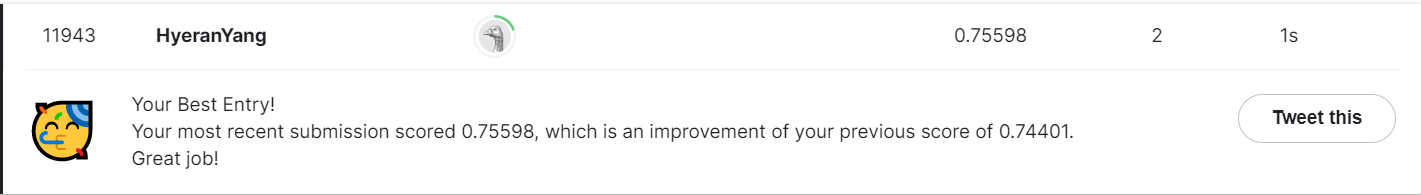

# StandardScaler -> Age, Fare 전처리

* 근데 표준화가 뭘하는 거지?
* age랑 fare는 음의 값이 나오는게 말이 안되는데..이걸 써도 되는건가?

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

In [ ]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Prefix
PassengerId,,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,0,0
2,1,1,1,38.0,1,0,71.2833,1,1
3,1,3,1,26.0,0,0,7.9250,0,2
4,1,1,1,35.0,1,0,53.1000,0,1
5,0,3,0,35.0,0,0,8.0500,0,0


In [ ]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Prefix
PassengerId,,,,,,,,
892,3,0,34.5,0,0,7.8292,2,0.0
893,3,1,47.0,1,0,7.0000,0,1.0
894,2,0,62.0,0,0,9.6875,2,0.0
895,3,0,27.0,0,0,8.6625,0,0.0
896,3,1,22.0,1,1,12.2875,0,1.0


### * colum transformer 사용

In [ ]:
col_names = ['Age', 'Fare']
col_trans = ColumnTransformer([
                               ('scaler', StandardScaler(), col_names)])

In [ ]:
new_cols = col_trans.fit_transform(titanic)

In [ ]:
titanic['new_age'] = new_cols[:, 0]

In [ ]:
titanic['new_fare'] = new_cols[:, 1]

In [ ]:
new_titanic = titanic.copy().drop(columns=['Age', 'Fare'])

### * 랜덤포레스트로 예측해 보기

In [ ]:
new_titanic.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Prefix,new_age,new_fare
PassengerId,,,,,,,,,
1,0,3,0,1,0,0,0,-0.533834,-0.502445
2,1,1,1,1,0,1,1,0.674891,0.786845
3,1,3,1,0,0,0,2,-0.231653,-0.488854
4,1,1,1,1,0,0,1,0.448255,0.420730
5,0,3,0,0,0,0,0,0.448255,-0.486337


In [ ]:
X = new_titanic.iloc[:, 1:].copy().values
y = new_titanic.iloc[:, 0].copy().values

In [ ]:
clf = RandomForestClassifier(n_estimators=200)

In [ ]:
cv = cross_validate(clf, X, y, n_jobs=-1, return_train_score=True)

In [ ]:
print('validation:', np.mean(cv['test_score']))
print('train:', np.mean(cv['train_score']))   # 과적합이 일어난다.

validation: 0.8103320569957944
train: 0.9862509258237863


### 하이퍼 파라미터 튜닝(grid cv)

* StandardScaler 쓰기 전 : 랜덤포레스트 cv.mean=0.8064 정도.
    * 이걸로 하이퍼 파라미터 튜닝이 의미가 있을까? : 간단히만 해보자.

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
params = {'n_estimators': np.arange(100, 300, 10),
          'min_samples_leaf': np.arange(1, 50)}

In [ ]:
grid_forest = GridSearchCV(RandomForestClassifier(), param_grid=params, n_jobs=-1)

In [ ]:
grid_forest.fit(X, y)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'n_estimators': array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220,
       230, 240, 250, 260, 270, 280, 290])})

In [ ]:
grid_forest.best_score_  # 오 값이 많이 올라갔다.

0.8372544096415794

In [ ]:
grid_forest.best_params_

{'min_samples_leaf': 2, 'n_estimators': 240}

In [ ]:
best_tree = grid_forest.best_estimator_

### test 예측 해보기 -> 점수내기

In [ ]:
# 이 모델로 test 예측-> 점수 내보기. 만들어둔 column transformer를 활용 전처리.

test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Prefix
PassengerId,,,,,,,,
892,3,0,34.5,0,0,7.8292,2,0.0
893,3,1,47.0,1,0,7.0000,0,1.0
894,2,0,62.0,0,0,9.6875,2,0.0
895,3,0,27.0,0,0,8.6625,0,0.0
896,3,1,22.0,1,1,12.2875,0,1.0


In [ ]:
col_names

['Age', 'Fare']

In [ ]:
col_trans

ColumnTransformer(transformers=[('scaler', StandardScaler(), ['Age', 'Fare'])])

In [ ]:
test_scaled = col_trans.fit_transform(test)

In [ ]:
test['new_age'] = test_scaled[:, 0]
test['new_fare'] = test_scaled[:, 1]

In [ ]:
test.drop(columns=['Age', 'Fare'], inplace=True)

In [ ]:
test.head()

,Pclass,Sex,SibSp,Parch,Embarked,Prefix,new_age,new_fare
PassengerId,,,,,,,,
892,3,0,0,0,2,0.0,0.393048,-0.497883
893,3,1,1,0,0,1.0,1.356309,-0.512750
894,2,0,0,0,2,0.0,2.512223,-0.464567
895,3,0,0,0,0,0.0,-0.184909,-0.482943
896,3,1,1,1,0,1.0,-0.570214,-0.417952


In [ ]:
X = test.values

In [ ]:
prediction= best_tree.predict(X)

In [ ]:
prediction[:5]

array([0, 0, 0, 0, 1])

In [ ]:
pred = pd.DataFrame(
    { 'PassengerId': test.index,
    'Survived': prediction
})

In [ ]:
pred[:5]

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
pred.to_csv('/content/drive/MyDrive/Colab Notebooks/스터디/submisson_4_0625.csv', index=False)

### 결과 : 0.79186 (3327위)

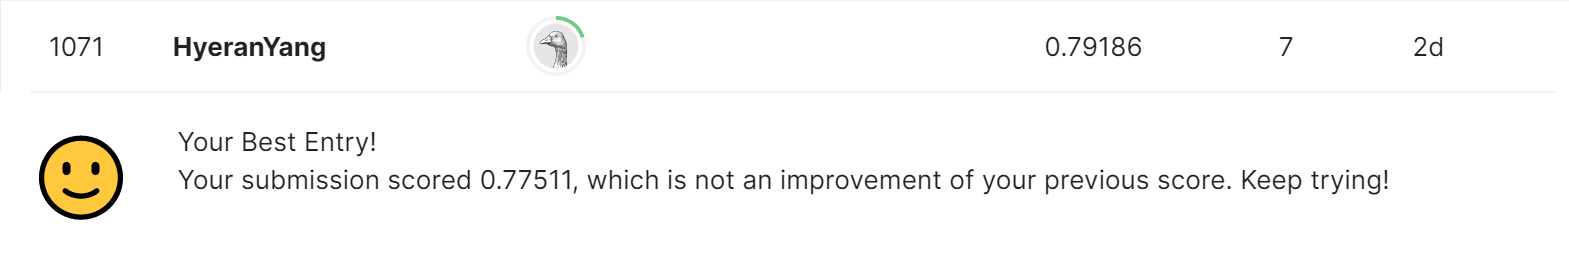

# Min-Max Scaler -> Age, Fare 전처리

In [ ]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Prefix,new_age,new_fare
PassengerId,,,,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,0,0,-0.533834,-0.502445
2,1,1,1,38.0,1,0,71.2833,1,1,0.674891,0.786845
3,1,3,1,26.0,0,0,7.9250,0,2,-0.231653,-0.488854
4,1,1,1,35.0,1,0,53.1000,0,1,0.448255,0.420730
5,0,3,0,35.0,0,0,8.0500,0,0,0.448255,-0.486337


In [ ]:
test.head()  # 복사를 안해뒀군...

,Pclass,Sex,SibSp,Parch,Embarked,Prefix,new_age,new_fare
PassengerId,,,,,,,,
892,3,0,0,0,2,0.0,0.393048,-0.497883
893,3,1,1,0,0,1.0,1.356309,-0.512750
894,2,0,0,0,2,0.0,2.512223,-0.464567
895,3,0,0,0,0,0.0,-0.184909,-0.482943
896,3,1,1,1,0,1.0,-0.570214,-0.417952


### min-max column transformer 생성

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
col_names

['Age', 'Fare']

In [ ]:
col_trans = ColumnTransformer([('scaler', MinMaxScaler(), col_names)])

In [ ]:
result = col_trans.fit_transform(titanic)  # 굳이 배열로 안바꾸고, df에서 해도됨. 컬럼명으로 찾으므로.

In [ ]:
titanic['new_age']= result[:, 0]
titanic['new_fare']=result[:, 1]
titanic.drop(columns=['Age', 'Fare'], inplace=True)

In [ ]:
titanic.head()  # 정규화 된 값들이 new_age, new_fare에 삽입됨.

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Prefix,new_age,new_fare
PassengerId,,,,,,,,,
1,0,3,0,1,0,0,0,0.271174,0.014151
2,1,1,1,1,0,1,1,0.472229,0.139136
3,1,3,1,0,0,0,2,0.321438,0.015469
4,1,1,1,1,0,0,1,0.434531,0.103644
5,0,3,0,0,0,0,0,0.434531,0.015713


### test 셋 전처리 : col_trans 이용

In [ ]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Prefix
PassengerId,,,,,,,,
892,3,0,34.5,0,0,7.8292,2,0.0
893,3,1,47.0,1,0,7.0000,0,1.0
894,2,0,62.0,0,0,9.6875,2,0.0
895,3,0,27.0,0,0,8.6625,0,0.0
896,3,1,22.0,1,1,12.2875,0,1.0


In [ ]:
col_trans

ColumnTransformer(transformers=[('scaler', MinMaxScaler(), ['Age', 'Fare'])])

In [ ]:
col_names

['Age', 'Fare']

In [ ]:
col = col_trans.fit_transform(test)

In [ ]:
test['new_age'] = col[:, 0]
test['new_fare'] = col[:, 1]

In [ ]:
test.drop(columns=col_names, inplace=True)

In [ ]:
test.head()

,Pclass,Sex,SibSp,Parch,Embarked,Prefix,new_age,new_fare
PassengerId,,,,,,,,
892,3,0,0,0,2,0.0,0.452723,0.015282
893,3,1,1,0,0,1.0,0.617566,0.013663
894,2,0,0,0,2,0.0,0.815377,0.018909
895,3,0,0,0,0,0.0,0.353818,0.016908
896,3,1,1,1,0,1.0,0.287881,0.023984


### 랜덤포레스트로 예측하기.

In [ ]:
X = titanic.iloc[:, 1:].copy().values
y = titanic.iloc[:, 0].copy().values

In [ ]:
X[:5]

array([[3.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.27117366, 0.01415106],
       [1.        , 1.        , 1.        , 0.        , 1.        ,
        1.        , 0.4722292 , 0.13913574],
       [3.        , 1.        , 0.        , 0.        , 0.        ,
        2.        , 0.32143755, 0.01546857],
       [1.        , 1.        , 1.        , 0.        , 0.        ,
        1.        , 0.43453129, 0.1036443 ],
       [3.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.43453129, 0.01571255]])

In [ ]:
y[:5]

array([0, 1, 1, 1, 0])

In [ ]:
cv = cross_validate(RandomForestClassifier(), X, y, n_jobs=-1,
                    return_train_score=True)
np.mean(cv['test_score'])   # 점수가 나쁘지 않다.

0.8035904839620865

In [ ]:
np.mean(cv['train_score'])  # 과대적합이 심하다.

0.9862509258237863

### 하이퍼 파라미터 튜닝: grid cv

In [ ]:
params = {'n_estimators': np.arange(100, 300, 10),
          'min_samples_leaf': np.arange(1, 50)}

In [ ]:
grid_min_max = GridSearchCV(RandomForestClassifier(), 
                            param_grid=params, n_jobs=-1,
                            return_train_score=True)

In [ ]:
grid_min_max.fit(X, y)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'n_estimators': array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220,
       230, 240, 250, 260, 270, 280, 290])},
             return_train_score=True)

In [ ]:
grid_min_max.best_score_  # 점수가 조금 올라왔다.

0.8372606867114432

In [ ]:
grid_min_max.best_params_

{'min_samples_leaf': 3, 'n_estimators': 160}

In [ ]:
best_log = grid_min_max.best_estimator_

In [ ]:
test.head()

,Pclass,Sex,SibSp,Parch,Embarked,Prefix,new_age,new_fare
PassengerId,,,,,,,,
892,3,0,0,0,2,0.0,0.452723,0.015282
893,3,1,1,0,0,1.0,0.617566,0.013663
894,2,0,0,0,2,0.0,0.815377,0.018909
895,3,0,0,0,0,0.0,0.353818,0.016908
896,3,1,1,1,0,1.0,0.287881,0.023984


### test 예측

In [ ]:
X = test.copy().values

In [ ]:
X[:5]

array([[3.        , 0.        , 0.        , 0.        , 2.        ,
        0.        , 0.4527232 , 0.01528158],
       [3.        , 1.        , 1.        , 0.        , 0.        ,
        1.        , 0.61756561, 0.01366309],
       [2.        , 0.        , 0.        , 0.        , 2.        ,
        0.        , 0.8153765 , 0.01890874],
       [3.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.35381775, 0.01690807],
       [3.        , 1.        , 1.        , 1.        , 0.        ,
        1.        , 0.28788079, 0.0239836 ]])

In [ ]:
prediction= best_log.predict(X)

In [ ]:
pred = pd.DataFrame({
    'PassengerId': test.index,
    'Survived': prediction
})

In [ ]:
pred.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
pred.to_csv('/content/drive/MyDrive/Colab Notebooks/스터디/submisson_5_0625.csv', index=False)

### 결과 : 0.77551

# 결론 : StandardScaler가 Min_Max_scaler 보다 적합하다.(Age, Fare)

# (심화) 하이퍼 파라미터 조정

In [ ]:
new_titanic

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Prefix,new_age,new_fare
PassengerId,,,,,,,,,
1,0,3,0,1,0,0,0,-0.533834,-0.502445
2,1,1,1,1,0,1,1,0.674891,0.786845
3,1,3,1,0,0,0,2,-0.231653,-0.488854
4,1,1,1,1,0,0,1,0.448255,0.420730
5,0,3,0,0,0,0,0,0.448255,-0.486337
...,...,...,...,...,...,...,...,...,...
887,0,2,0,0,0,0,4,-0.156107,-0.386671
888,1,1,1,0,0,0,2,-0.760469,-0.044381
889,0,3,1,1,2,0,2,-0.382743,-0.176263


In [ ]:
col_names

['Age', 'Fare']

In [ ]:
col_trans_std = col_trans
col_trans_std

ColumnTransformer(transformers=[('scaler', StandardScaler(), ['Age', 'Fare'])])

## 모델 삽입 데이터 준비

In [ ]:
X = new_titanic.iloc[:, 1:].copy().values
y = new_titanic['Survived'].copy().values

In [ ]:
X[:5]

array([[ 3.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        , -0.53383369, -0.50244517],
       [ 1.        ,  1.        ,  1.        ,  0.        ,  1.        ,
         1.        ,  0.67489052,  0.78684529],
       [ 3.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         2.        , -0.23165264, -0.48885426],
       [ 1.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.44825473,  0.42073024],
       [ 3.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.44825473, -0.48633742]])

In [ ]:
y[:5]

array([0, 1, 1, 1, 0])

## 랜덤 포레스트 하이퍼 파라미터 조정

* 이전 테스트에서 파라미터
    * params = 
    ```
    {'n_estimators': np.arange(100, 300, 10), 'min_samples_leaf': np.arange(1, 50)}
    ```
    * best_params : 
    ```
    {'min_samples_leaf': 2, 'n_estimators': 240}
    ```
    * best_scores : 0.8372544096415794
* 랜덤 포레스트 주요 파라미터
    * n_estimators / 기본값=100 : num of trees
    * max_depth : 트리 최대 깊이
    * min_samples_split / 기본값=2 : 노드 분할 위해 필요한 샘플 최소 갯수.
    * min_impurity_decrease/ 기본값=0.0 : 불순도가 이 값보다 같거나 크도록, 노드를 분할.
    * oob_score : out-of-bag score

In [ ]:
params = {
    'n_estimators': np.arange(200, 300, 5),
    'min_samples_leaf': np.arange(1, 20)}

In [ ]:
grid = GridSearchCV(RandomForestClassifier(n_jobs=-1, oob_score=True), param_grid=params,
                    n_jobs=-1, return_train_score=True)

In [ ]:
grid.fit(X, y)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, oob_score=True),
             n_jobs=-1,
             param_grid={'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'n_estimators': array([200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260,
       265, 270, 275, 280, 285, 290, 295])},
             return_train_score=True)

In [ ]:
grid.best_score_

0.8361370912058252

In [ ]:
grid.best_params_

{'min_samples_leaf': 2, 'n_estimators': 285}